### 1. 环境准备

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

### 2. 数据处理




In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
raw_data = pd.read_csv(url)
print(raw_data.shape)
raw_data

(41202, 13)


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


In [14]:
correlation_values = raw_data.corr()['tip_amount'] # 只取目标向量与其他字段之间的皮尔逊系数
print(correlation_values.shape)
correlation_values=correlation_values.drop('tip_amount') # 去掉1d向量的这一行，不需要tip_amount对tip_amount ，自己对自己，p系数永远是1
print(correlation_values.shape)
correlation_values

(13,)
(12,)


VendorID                      NaN
passenger_count          0.015081
trip_distance            0.101819
RatecodeID               0.094075
store_and_fwd_flag       0.000320
PULocationID            -0.023086
DOLocationID             0.024348
payment_type                  NaN
fare_amount              0.200638
mta_tax                 -0.054488
tolls_amount             0.116172
improvement_surcharge   -0.000727
Name: tip_amount, dtype: float64

<Axes: >

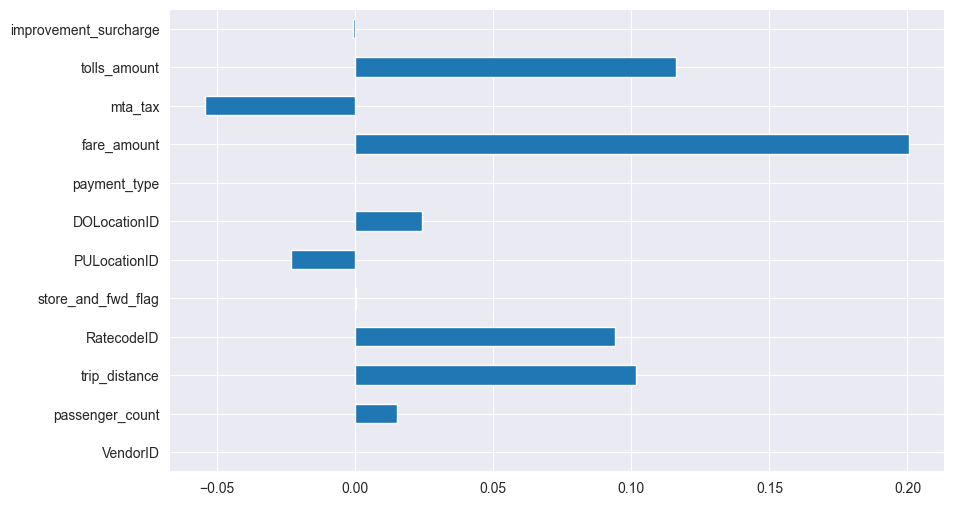

In [3]:

correlation_values.plot(kind='barh', figsize=(10, 6))

In [15]:
# extract the labels from the dataframe
y = raw_data[['tip_amount']].values.astype('float32')

# drop the target variable from the feature matrix
proc_data = raw_data.drop(['tip_amount'], axis=1)

# get the feature matrix used for training
X = proc_data.values

X

array([[ 2.  ,  1.  , 17.63, ...,  0.5 ,  6.94,  1.  ],
       [ 2.  ,  1.  , 19.52, ...,  0.5 ,  6.94,  1.  ],
       [ 2.  ,  1.  , 17.81, ...,  0.5 ,  6.94,  1.  ],
       ...,
       [ 2.  ,  1.  , 17.31, ...,  0.5 ,  6.94,  1.  ],
       [ 2.  ,  1.  , 17.28, ...,  0.5 ,  6.94,  1.  ],
       [ 2.  ,  1.  , 16.82, ...,  0.5 ,  6.94,  1.  ]], shape=(41202, 12))

In [17]:
# normalize the feature matrix； 数据归一化处理
X = normalize(X, axis=1, norm='l1', copy=False)
X

array([[0.00501165, 0.00250583, 0.04417771, ..., 0.00125291, 0.01739043,
        0.00250583],
       [0.00422869, 0.00211434, 0.04127199, ..., 0.00105717, 0.01467355,
        0.00211434],
       [0.0070609 , 0.00353045, 0.06287732, ..., 0.00176523, 0.02450132,
        0.00353045],
       ...,
       [0.00537996, 0.00268998, 0.04656355, ..., 0.00134499, 0.01866846,
        0.00268998],
       [0.00427606, 0.00213803, 0.03694518, ..., 0.00106902, 0.01483794,
        0.00213803],
       [0.00494731, 0.00247366, 0.04160689, ..., 0.00123683, 0.01716717,
        0.00247366]], shape=(41202, 12))

### 3. 模型训练

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeRegressor

# for reproducible output across multiple function calls, set random_state to a given integer value
dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=8, 
                               random_state=35)

In [24]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=35)

### 4. 模型评估

In [25]:
y_pred = dt_reg.predict(X_test)

# evaluate mean squared error on the test dataset
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

MSE score : 24.555
R^2 score : 0.028
